<a href="https://colab.research.google.com/github/yoohw0317/DAPproject/blob/main/DAP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re
from wordcloud import WordCloud 

In [5]:
df = pd.read_excel("https://github.com/yoohw0317/DAPproject/blob/main/data.xlsx?raw=true")
df = df[['score', 'review']]
df.dropna
df

score                                             review
0        5  11/26~27일 숙박이었는데 그 시간에 일해주신 분들이 너무 친절해서 좋았습니다....
1        2  숙박 바우처가 생겨서 11월 24일 투숙을 했습니다.일이 생겨서 저녁 7시쯤 늦게 ...
2        5  모든것이 좋았습니다.다만 욕조 물빠지는 소리가 좀 거슬리긴 했어요그거 외에는 인생에...
3        5  엄마랑 처음 호캉스 간거엿는데 호텔 입구부터 직원분들의 친절함, 그리고 객실 상태 ...
4        5  결혼 후에 특별한 숙박을 위해 방문했습니다. 최고의 서비스와 시설들로 매우 만족스러...
..     ...                                                ...
428      5  우리는 2박을 묵었는데 서명인 서울. 대부분의 택시 기사가 호텔을 모르는 서명인, ...
429      5  우리는 두 개의 절대적으로 환상적인, 잊을 수 없는 일을 서명인. 도착했을 때, 우...
430      5  다음에도 꼭 이곳에 다시 올 걸지 사용자_이름:. 방에 도착했을 때 제공된 웰컴 드...
431      5  76 층 로비. 시작할 수 있습니다. 룸 92 차 바닥. 환상적인 전망이 다. 매우...
432      5  제가 사랑하는 내에서의 signiel. 전망은 놀라운 호텔 직원들이 도와 요청해도 ...

[433 rows x 2 columns]

In [6]:
def regularExpression (text):
  exp = re.compile('[^ 가-힣]')
  return exp.sub('', text);

해당 test에 한글을 제외한 모든 것들이 걸러지는지 시험하기 위해 한국어를 제외한 대부분의 모든 것들을 넣어줍니다.

1. 숫자

2. ㅠㅠ ㅋㅋ와 같은 이모티콘

3. .,!와 같은 기호

4. 하트, 별과 같은 이모티콘

In [7]:
test='12월 15일에 테스트 해봅니당...ㅠㅠㅠㅠ 제발 성공하기를 흑ㅠㅠㅠㅠㅠㅠㅠㅠㅎㅎㅎㅎㅎㅎ, plz plz success...!!!!! 다 지워져라 얍★'
regularExpression(test)

'월 일에 테스트 해봅니당 제발 성공하기를 흑    다 지워져라 얍'

해당 환경설정은 사용자에 맞는 환경설정을 사용해야합니다.

그렇지 않으면 상상치도 못한 오류에 직면하게 될 수도 있습니다.

코드 작성자의 환경은 다음과 같습니다.

Python 3.8.8

java 17.0.1 2021-10-19 LTS

Java(TM) SE Runtime Environment (build 17.0.1+12-LTS-39)

Java HotSpot(TM) 64-Bit Server VM (build 17.0.1+12-LTS-39, mixed mode, sharing)

JPype1-1.3.0-cp38-cp38-win_amd64.whl



In [8]:
!apt-get update 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-13.0.2"

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/

In [9]:
from konlpy.tag import Okt
from collections import Counter

만약 에러가 발생한다면 해당 코드에 들어가서 에러가 나는 부분을 지워주면 정상 실행될 때도 있습니다.


이게 무슨소린가 싶겠지만 직접 해본사람은 이해할 수 있습니다.

In [10]:
test = regularExpression(df['review'][0])
test
okt = Okt()
testnouns = okt.nouns(test)
testnouns #정상 추출 확인!

['일', '숙박', '그', '시간', '일', '분', '조만간', '다시', '예약', '가족', '또', '해']

말뭉치를 생성

말뭉치: 자연어처리에서 자연어의 집합

In [11]:
totalCorpus = "".join(df['review'].tolist())
totalCorpus[:40]

'11/26~27일 숙박이었는데 그 시간에 일해주신 분들이 너무 친절해서 '

In [12]:
totalCorpus = regularExpression(totalCorpus)
totalCorpus[:40]

'일 숙박이었는데 그 시간에 일해주신 분들이 너무 친절해서 좋았습니다조만간'

In [13]:
nouns = okt.nouns(totalCorpus)
print(nouns[:20])

['일', '숙박', '그', '시간', '일', '분', '조만간', '다시', '예약', '가족', '또', '해', '숙박', '바', '처가', '월', '일', '투숙', '일이', '저녁']


In [14]:
totalcount_notFiltered = Counter(nouns)
print(totalcount_notFiltered.most_common(20))

[('호텔', 355), ('직원', 291), ('서비스', 285), ('니엘', 201), ('객실', 178), ('것', 177), ('최고', 172), ('뷰', 164), ('정말', 143), ('이용', 132), ('방문', 131), ('층', 129), ('시설', 127), ('라운지', 126), ('체크', 124), ('수', 124), ('시간', 95), ('룸', 95), ('서울', 95), ('때', 85)]


https://www.ranks.nl/stopwords/korean

불용어 사전 링크를 참고해서 엑셀로 정리하여 사용

In [15]:
stopWords = pd.read_excel('https://github.com/yoohw0317/DAPproject/blob/main/stopwords.xlsx?raw=true').values.tolist()

In [16]:
filteredNouns = [x for x in nouns if [x] not in stopWords]
totalCount = Counter(filteredNouns)
print(totalCount.most_common(20))

[('직원', 291), ('서비스', 285), ('객실', 178), ('최고', 172), ('뷰', 164), ('정말', 143), ('이용', 132), ('방문', 131), ('층', 129), ('시설', 127), ('라운지', 126), ('체크', 124), ('수', 124), ('룸', 95), ('조식', 84), ('투숙', 77), ('전망', 69), ('다시', 67), ('생각', 64), ('곳', 63)]


**뷰, 룸, 방 **을 제외하고는 한 글자가 의미가 없어보임. filter 다시 해봅시다 

이번에는 뷰, 룸, 방을 제외한 한 글자는 모두 사라지도록


In [17]:
filteredNouns = [x for x in filteredNouns if len(x) > 1 or x == '뷰' or x == '룸' or x == '방']
totalCount = Counter(filteredNouns)
print(filteredNouns[:20])
print(totalCount.most_common(20))

['숙박', '조만간', '다시', '예약', '가족', '숙박', '처가', '투숙', '일이', '저녁', '체크', '체크', '추가', '한강', '뷰', '변경', '프리미어', '더블', '룸', '업그레이드']
[('직원', 291), ('서비스', 285), ('객실', 178), ('최고', 172), ('뷰', 164), ('정말', 143), ('이용', 132), ('방문', 131), ('시설', 127), ('라운지', 126), ('체크', 124), ('룸', 95), ('조식', 84), ('투숙', 77), ('전망', 69), ('다시', 67), ('생각', 64), ('매우', 58), ('기분', 56), ('수영장', 55)]


이 과정을 함수로 표현합니다.

언젠가 쓸 일이 있을 겁니다.

In [18]:
def corpusToNouns (text):
  text = regularExpression(text)
  nouns = okt.nouns(text)
  nouns = [x for x in nouns if [x] not in stopWords]
  nouns = [x for x in nouns if len(x) > 1 or x == '뷰' or x == '룸' or x == '방']
  nouns_counter = Counter(nouns)
  return nouns_counter

그래프에 사용할 폰트를 업로드합니다.

폰트는 한글이 지원되는 폰트면 무엇이든 가능합니다.

대신 폰트의 이름은 'this'로 고정해주세요 (확장자가 포함된다면 this.ttf)


In [19]:
from google.colab import files
files.upload()

Saving this.ttf to this.ttf


{'this.ttf': b'\x00\x01\x00\x00\x00\x11\x01\x00\x00\x04\x00\x10GPOS\x90P\x8b)\x00"&\xa4\x00\x00\x0c\x1eGSUB\x00\x19\x00\x0c\x00"&\x94\x00\x00\x00\x10OS/2d\xb0Wt\x00\x00\x01\x98\x00\x00\x00`cmapMh\xcb#\x00\x00\xec\x94\x00\x00V\x80cvt \x00\xc0\x00\x80\x00\x01E\x04\x00\x00\x00\x0efpgm\x06X\x9c6\x00\x01C\x14\x00\x00\x01sgasp\x00\x18\x00!\x00"&\x84\x00\x00\x00\x10glyf\xfd\x93\x8eM\x00\x02W\x98\x00\x1c\xc7\x1ahead\x18K\xe2(\x00\x00\x01\x1c\x00\x00\x006hhea\t\xe24\xc4\x00\x00\x01T\x00\x00\x00$hmtx|\xfb\rk\x00\x00\x01\xf8\x00\x00\xea\x9akern\x94\xb87\xdb\x00\x1f\x1e\xb4\x00\x00\x0f0locaK\xe01\xda\x00\x01E\x14\x00\x01\x12\x84maxpF\xeb\x05s\x00\x00\x01x\x00\x00\x00 nameJ\x95N\xdd\x00\x1f-\xe4\x00\x00\x05\xa4post*\xc4\n\xf2\x00\x1f3\x88\x00\x02\xf2\xf9prep\xf9I\xe0\xb0\x00\x01D\x88\x00\x00\x00z\x00\x01\x00\x00\x00\x01\x02\x8f\x0f\xb1\x10\xa3_\x0f<\xf5\x00\x1f\x03\xe8\x00\x00\x00\x00\xd9\x8b\xccY\x00\x00\x00\x00\xd9\xaf\xcf\x92\xff\xd0\xfe\xc7\x06\x0e\x04\x01\x00\x00\x00\x08\x00\x01\x00\x01\x00\x0

여기까지 사실 필요한 데이터는 대부분 뽑은거죠.


이제 데이터를 이용해서 호텔의 리뷰를 분석해봅시다.


우선적으로 아래에 있는 코드 2줄은 한글 폰트를 적용하는 변수 이름입니다.



In [20]:
font_label=fm.FontProperties(fname='/content/this.ttf', size=20)
font_title=fm.FontProperties(fname='/content/this.ttf', size=30)
font_xticks=fm.FontProperties(fname='/content/this.ttf', size=12)
font_yticks=fm.FontProperties(fname='/content/this.ttf', size=12)
font_bar=fm.FontProperties(fname='/content/this.ttf', size=15)

1. 전체적인 내용에서 주요 단어 빈도수 분석

파싱된 명사의 개수는 중복을 포함해서 10317개로 단어에 대한 비율이 너무 작게 나타날 우려가 존재합니다.

그래서 상위 50위의 단어들을 파악해봅시다.


In [21]:
sum(totalCount.values())

10317

In [22]:
top50 = totalCount.most_common(50)
x = [x for (x, y) in top50]
y = [y for (x, y) in top50]
colors_top50 = sns.color_palette('Spectral', 50)

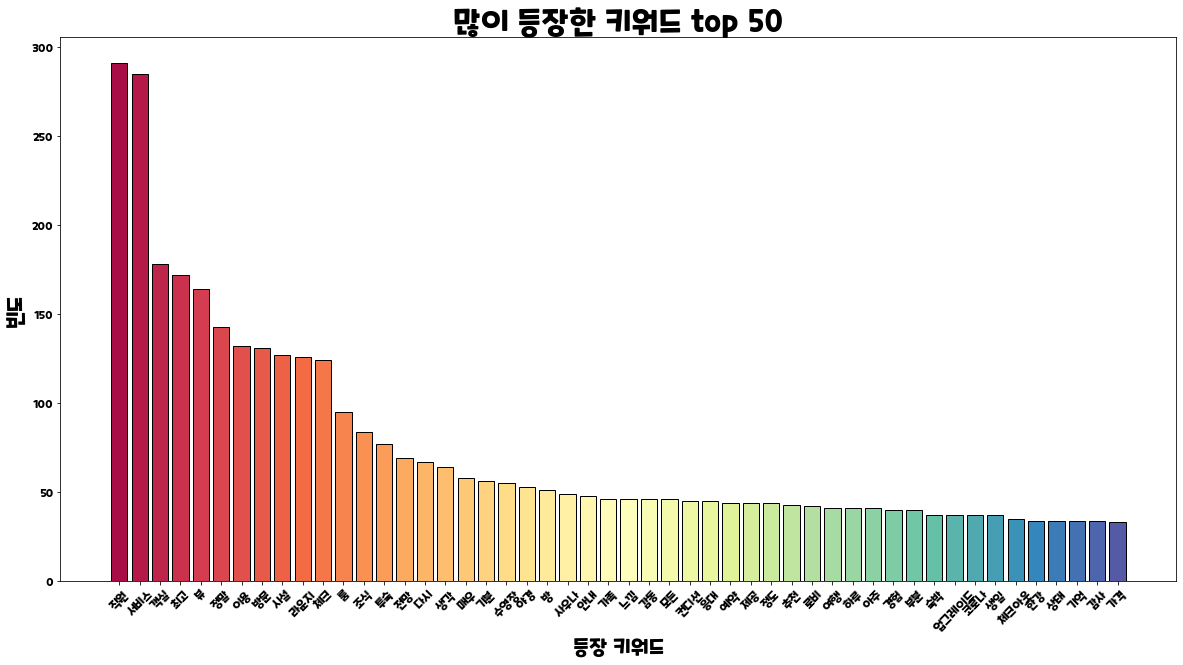

In [23]:
plt.figure(figsize = (20, 10))
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

워드클라우드 분석은 일부로 전체 단어를 놓고 했습니다.

어차피 워드클라우드에서 너무 많다고 여겨지면 알아서 컷 해줍니다.

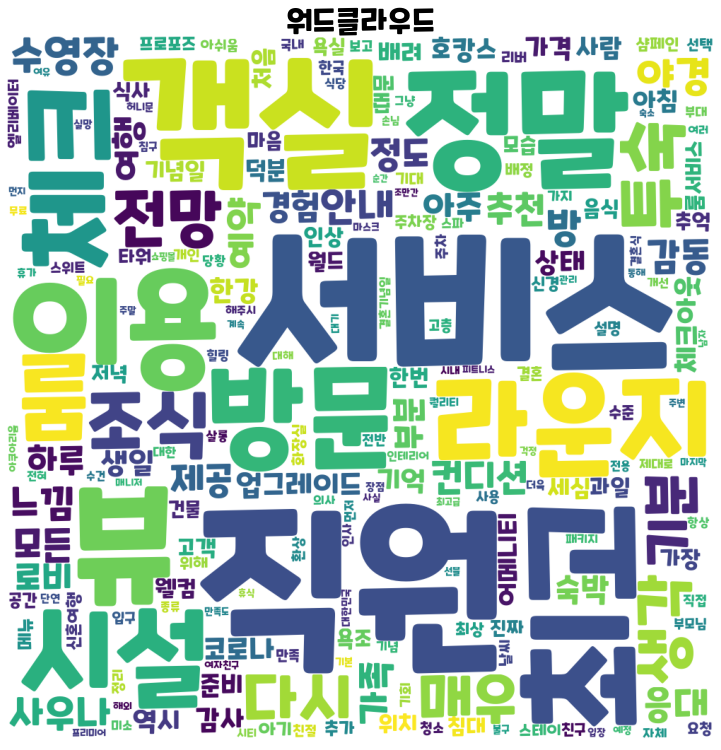

In [24]:
wordCloud = WordCloud(max_font_size=250, font_path='/content/this.ttf', background_color='white', width=1000, height=1000).generate_from_frequencies(totalCount)
plt.figure(figsize=(13, 13))
plt.imshow(wordCloud)
plt.title("워드클라우드", fontproperties=font_title)
plt.axis('off')
plt.show()

 점수별 분포와 점수에 따른 단어 빈도수 체크




In [25]:
rating = Counter(df['score'])
rating = sorted(rating.items())
rating

[(1, 4), (2, 6), (3, 9), (4, 38), (5, 376)]

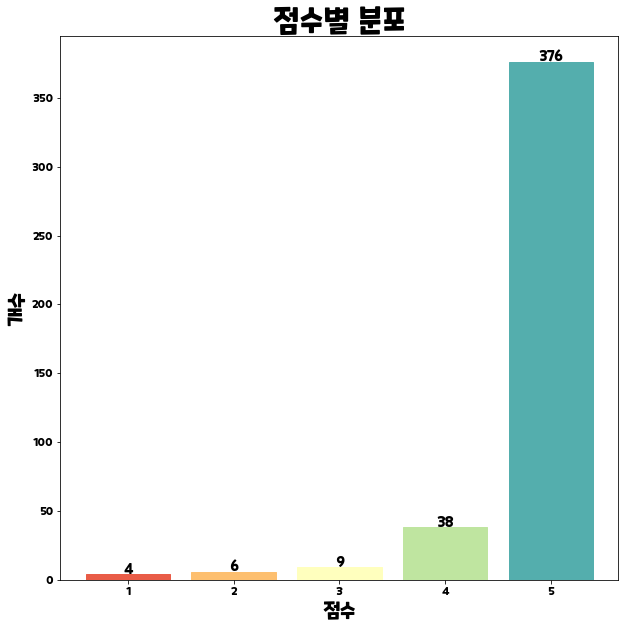

In [26]:
colors_rating = sns.color_palette('Spectral', 5)
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()
x = [x for (x, y) in rating]
y = [y for (x, y) in rating]
bars = plt.bar(x, y, color=colors_rating, edgecolor=colors_rating)

barText_rating = y
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width() * (1/2), b.get_height()+0.2, barText_rating[i], ha='center', fontsize=13, fontproperties=font_bar)

plt.xlabel("점수",fontproperties=font_label)
plt.ylabel("개수",fontproperties=font_label)
plt.xticks(fontproperties=font_xticks)
plt.yticks(fontproperties=font_yticks)
plt.title("점수별 분포",fontproperties=font_title)
plt.show()

선호 리뷰와 비선호 리뷰를 분석해봅시다.

In [27]:
likes =  df[df['score']>3]
dislikes = df[df['score'] <= 3]
likesCorpus = "".join(likes['review'])
likesNouns = corpusToNouns("".join(likesCorpus))
dislikesCorpus = "".join(dislikes['review'])
dislikesNouns = corpusToNouns("".join(dislikesCorpus))

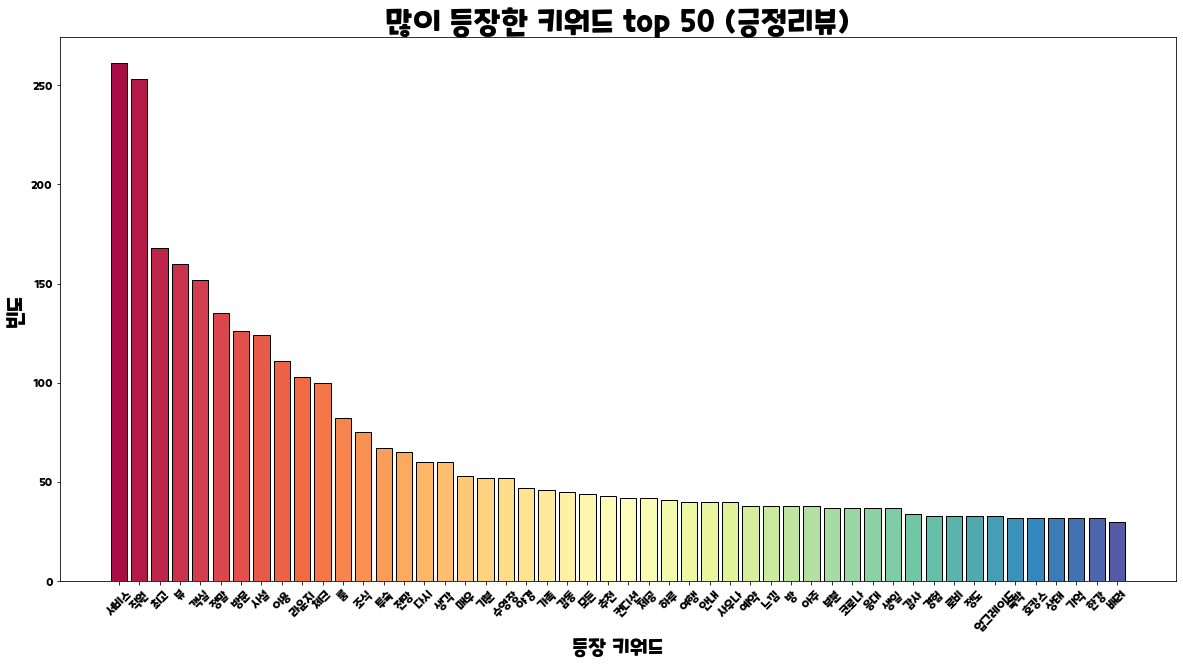

In [28]:
likes_top50 = likesNouns.most_common(50)
plt.figure(figsize = (20, 10))
x = [x for (x, y) in likes_top50]
y = [y for (x, y) in likes_top50]
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50 (긍정리뷰)",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

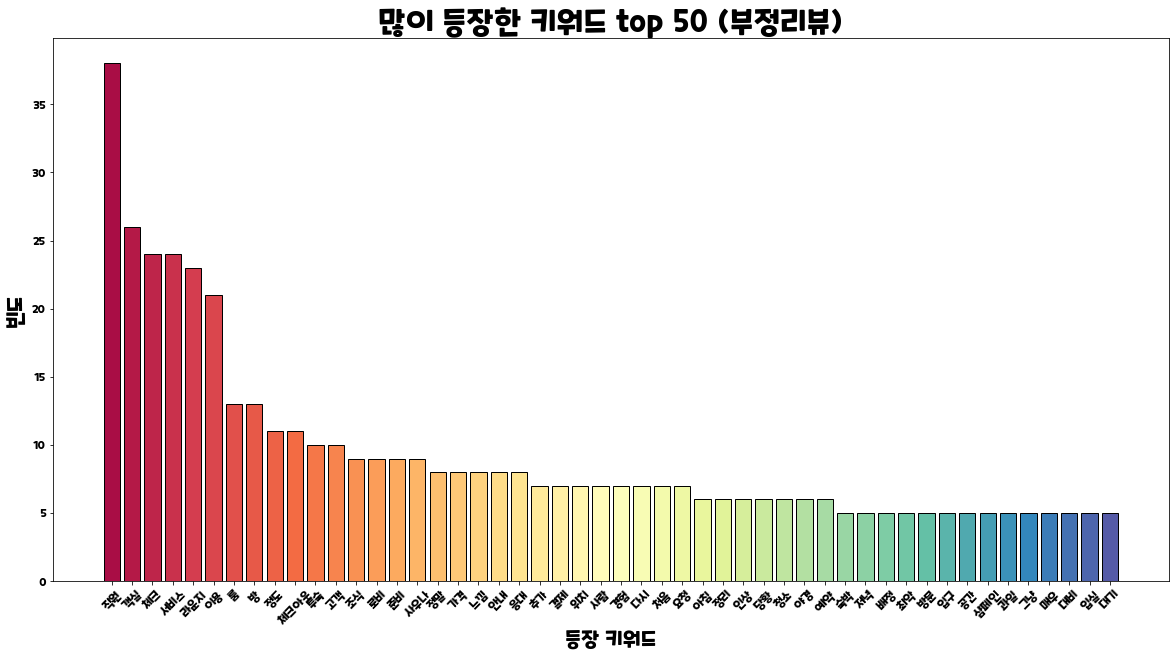

In [29]:
dislikes_top50 = dislikesNouns.most_common(50)
plt.figure(figsize = (20, 10))
x = [x for (x, y) in dislikes_top50]
y = [y for (x, y) in dislikes_top50]
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50 (부정리뷰)",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

단순히 이거로만 본다면 직원과 객실, 서비스가 부정적인 것으로 보여진다.

하지만 해당 단어는 긍정적인 리뷰에서도 많이 볼 수 있기 때문에 직원, 객실이 부정적인 영향을 미치는지 알 수없다.


여기서 정상적인 감성 분석을 위해 TF-IDF 모델을 사용한다.

우선적으로 bag of Words 벡터를 생성


In [115]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(tokenizer = lambda x : corpusToNouns(x))
reviewList = df['review'].tolist()
bow_vect = vect.fit_transform(reviewList)
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [116]:
print(word_list[:20])
print(count_list[:20])
bow_vect.shape

['가게', '가격', '가구', '가기', '가까이', '가끔', '가나', '가능', '가능성', '가도', '가드', '가득', '가라', '가량', '가루', '가면', '가방', '가성', '가슴', '가습기']
[ 5 29  2  7  1  4  1  1  1  2  2  1  2  2  2  4  1  2  3  1]


(433, 2161)

In [119]:
word_count_dict = dict(zip(word_list, count_list))

boW 벡터와 관련하여 TF-IDF 변환을 진행

In [100]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [121]:
print(tf_idf_vect.shape)
print(tf_idf_vect[0])

(433, 2161)
  (0, 1629)	0.577564273266136
  (0, 1271)	0.4224803374964787
  (0, 1024)	0.4258910136134034
  (0, 343)	0.3689872063577225
  (0, 28)	0.41278948720030717


In [102]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}

위에서 나누어준 likes 와 dislikes를 가지고 Training을 해봅시다.

In [103]:
import copy
df_test = copy.deepcopy(df)
def likeDislike(score):
  if score >= 4:
    return 1
  else:
    return 0
df_test['likeDislike'] = df_test['score'].apply(lambda x : likeDislike(x))
df_test

score                                             review  likeDislike
0        5  11/26~27일 숙박이었는데 그 시간에 일해주신 분들이 너무 친절해서 좋았습니다....            1
1        2  숙박 바우처가 생겨서 11월 24일 투숙을 했습니다.일이 생겨서 저녁 7시쯤 늦게 ...            0
2        5  모든것이 좋았습니다.다만 욕조 물빠지는 소리가 좀 거슬리긴 했어요그거 외에는 인생에...            1
3        5  엄마랑 처음 호캉스 간거엿는데 호텔 입구부터 직원분들의 친절함, 그리고 객실 상태 ...            1
4        5  결혼 후에 특별한 숙박을 위해 방문했습니다. 최고의 서비스와 시설들로 매우 만족스러...            1
..     ...                                                ...          ...
428      5  우리는 2박을 묵었는데 서명인 서울. 대부분의 택시 기사가 호텔을 모르는 서명인, ...            1
429      5  우리는 두 개의 절대적으로 환상적인, 잊을 수 없는 일을 서명인. 도착했을 때, 우...            1
430      5  다음에도 꼭 이곳에 다시 올 걸지 사용자_이름:. 방에 도착했을 때 제공된 웰컴 드...            1
431      5  76 층 로비. 시작할 수 있습니다. 룸 92 차 바닥. 환상적인 전망이 다. 매우...            1
432      5  제가 사랑하는 내에서의 signiel. 전망은 놀라운 호텔 직원들이 도와 요청해도 ...            1

[433 rows x 3 columns]

In [104]:
from sklearn.model_selection import train_test_split
x = tf_idf_vect
y = df_test['likeDislike']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [105]:
x_test.shape, y_test.shape

((130, 2161), (130,))

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logi = LogisticRegression(random_state = 0)
logi.fit(x_train, y_train)

y_pred = logi.predict(x_test)

In [107]:
print('accurancy: ', accuracy_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

accurancy:  0.9769230769230769
precision:  0.9769230769230769
recall:  1.0
F1:  0.9883268482490272


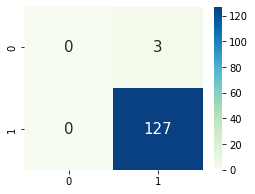

In [108]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='GnBu', fmt='.10g')
plt.show()

In [109]:
df_test['likeDislike'].value_counts()

1    414
0     19
Name: likeDislike, dtype: int64

In [137]:
positiveRandom = df_test[df_test['likeDislike'] == 1].sample(19, random_state=12).index.tolist()
negativeRandom = df_test[df_test['likeDislike'] == 0].sample(19, random_state=12).index.tolist()

In [203]:
random = positiveRandom + negativeRandom
x = tf_idf_vect[random]
y = df_test['likeDislike'][random]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [204]:
logi2 = LogisticRegression(random_state = 0)
logi2.fit (x_train, y_train)
y_predict = logi2.predict(x_test)

In [205]:
print('accurancy: ', accuracy_score(y_test, y_predict))
print('precision: ', precision_score(y_test, y_predict))
print('recall: ', recall_score(y_test, y_predict))
print('F1: ', f1_score(y_test, y_predict))

accurancy:  0.375
precision:  0.2857142857142857
recall:  1.0
F1:  0.4444444444444445


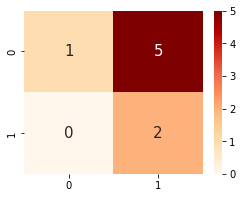

In [206]:
confusion = confusion_matrix(y_true = y_test, y_pred = y_predict)
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15 }, cmap='OrRd', fmt='.10g')
plt.show()

<BarContainer object of 2161 artists>

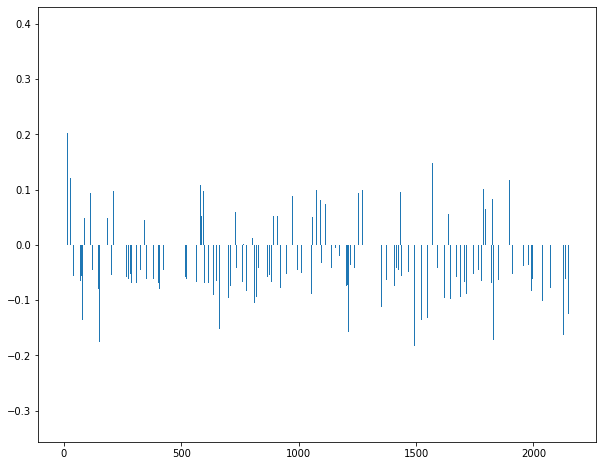

In [207]:
plt.figure(figsize= (10, 8))
plt.bar(range(len(logi2.coef_[0])), logi2.coef_[0])

In [208]:
pos_index = sorted(((value, index)for index, value in enumerate(logi2.coef_[0])),reverse = True)
neg_index = sorted(((value, index)for index, value in enumerate(logi2.coef_[0])),reverse = False)

In [209]:
for x in pos_index[:30]:
  print(invert_index_vectorizer[x[1]], x[0])

뷰 0.3948602226196965
시설 0.2868635033103355
조식 0.26754792154096535
생각 0.26686125210181927
인사 0.23389914357473318
특유 0.22067565355262703
환상 0.20464271777135998
가면 0.20250168976979394
소리 0.18855408655546071
그거 0.18855408655546071
모든 0.1868495539829012
하루 0.18321642692309978
최고 0.18061097945838234
기억 0.16505956743325095
부족함 0.1613773252366213
가지 0.1611451523476983
어려움 0.15688866600527432
배려 0.15311918643934516
감사 0.15245572289276552
운동 0.14972062240964376
전화 0.14871696663003203
한가지 0.1476780211291006
감동 0.1459060679329313
만난 0.14251124465219958
한강 0.1372344702529579
호캉스 0.13023594588593185
지고 0.1290206688944267
센터 0.12848714652237098
비품 0.1228080394943626
피트니스 0.1221891501476513


In [210]:
for x in neg_index[:40]:
  print(invert_index_vectorizer[x[1]], x[0])

가격 -0.32040526914224804
대비 -0.2820455912564034
음료 -0.2496457109082458
로서 -0.2321132758277719
추가 -0.2270934325229166
럭셔리 -0.2253843913434419
이해 -0.21220937829432715
전망 -0.19826206314801317
최악 -0.1908193029155754
정리 -0.18489305096227238
입실 -0.1832040365962618
먼지 -0.18124819019291782
아침 -0.1803704196196018
경험 -0.17777052783116223
공기청정기 -0.17476408826020753
표면 -0.17476408826020753
침구 -0.17241878008566375
방 -0.1677506642683872
결제 -0.1652624862673426
핸드폰 -0.16365721051388668
환기 -0.16365721051388668
부족 -0.16325887529864683
굿굿굿 -0.1581346614438495
업글햇 -0.1581346614438495
층뷰 -0.1581346614438495
개선 -0.1577094314489521
청소 -0.1550266075634041
미니바 -0.15296640989178104
의향 -0.14808464276096323
차이 -0.14808464276096323
완료 -0.1450650497106048
도착 -0.14180929970305067
메리트 -0.14095404102716233
입구 -0.13889314532157085
잠실 -0.13641636182222164
거실 -0.13542311662743528
스위트룸 -0.13542311662743528
고월 -0.1337623699676093
불편룸 -0.1337623699676093
적응 -0.1337623699676093


In [179]:
dislikes

score                                             review
1        2  숙박 바우처가 생겨서 11월 24일 투숙을 했습니다.일이 생겨서 저녁 7시쯤 늦게 ...
42       3  객실 종류: City View Room우선 위치는 서울내에서도 손꼽힐 정도로 좋다....
55       2  1. 룸컨디션은 정먈 최상. 프리미어 룸 기준 객실 내 업무공간이 준수함. 책상 및...
65       2  일단 하드웨어는 국내 최고라고 말할 수 있다. 내 취향의 인테리어는 아니지만 그냥 ...
99       1  프론트에 들어서자 2.5단계가 무색할만큼 마스크를 벗고 대화를 나누는, 사진을 찍는...
100      1  3시 체크인에 맞춰 도착하니 배정 받은 방이 3시 40분 입실 가능하다고하여 라운지...
215      3  추가비내고 스위트룸으로 업글햇는데100층뷰가 아주 좋았습니다.다음에또 이용할의향은 ...
216      3  시설은 아주 좋으나 부대시설을 다 이용하기에 제약이 많이 있습니다. 라운지나 수영장...
224      2  체크인하러 2:30분에 도착해서 3:25분에 들어갔네요. 체크인 대기팀이 제 앞으로...
268      3  엄청난 고층에서의 투숙 경험과 직원 분들의 친절함은 매우 인상 깊고 좋았습니다. 하...
288      3  야경  한강뷰보고 감탄을 금치못했어요..해외까지 가서 야경을 볼 필요가 없을것같아요...
291      1  몇번 이용을 했었고 이번에는 석촌호수 벚꽃시즌에 맞춰 부모님을 모시고 가려고 Sig...
319      3  전망은 인생 경험으로 매우 훌륭하고 좋았으나 이런 급의 럭셔리 호텔로서는 믿어지지 ...
341      2  [Web발신]남편과 이용 할 기회가 생겼습니다.기대를 많이 했습니다. 대한민국 최고...
368      3  리셉션 응대 훌륭전망 및 야경 좋음고층이라 몸이 적응 못할수있음방은 가격대비 작고9...
418      2  금액은 트립어드바이저 보다 낮았어요. 검색 조금 더 하심 여기 최저가 보다 저렴합니...
419      3  친절한 서비스는 만족다만, 침구에서 나오는 먼지의 량이 상당했음. 핸드폰 표면에 묻...
425      3  블로그에도 상세하게 작성하였으니 간단하게 작성합니다.체크인 아웃간 응대는 좋았습니다...
426      1  6성급호텔를 표방하려는 롯데호텔 프리미엄 브랜드로 도약하려면 아직 멀어 보입니다.첫...